In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import dectrees.python.dtree as d
import dectrees.python.monkdata as m

In [2]:
monks = [m.monk1, m.monk2, m.monk3]
monks_test = [m.monk1test, m.monk2test, m.monk3test]

### Assignment 0

By observation of the concepts behind the datasets, we conclude that MONK-1 must be the data set that is the easiest to learn. This is the case since it has less variation in the rules of the dataset than the other two sets. In theory it would be possible to correctly classify a datapoint A = (A1, A2, A3, A4, A5, A6) using only two questions: Is A5 == 1, and is A1 == A2. 

For MONK-2 the questions one would have to pose require identifying exactly any two attributes that are equal to 1 for a positive classification. The complexity comes from the many combinations of attributes that needs to be checked to determine the classification, making it harder for a decision tree to learn compared to MONK-1.

For MONK-3 the complexity is considerably lower than MONK-2, but since we have to deal with added noise in MONK-3 the decision tree will be more prone to overfitting relative to a validation set, making it harder for the tree to correctly classify all the datapoints in said validation set.

The conclusion is therefore that it is harder for a decision tree algorithm to learn MONK-2 since we would have to pose many more questions than for the other datasets. Even though a decision tree for MONK-2 could have more accuracy than one for MONK-3, it would still be easier for an algorithm to learn the problem that MONK-3 poses.

### Assignment 1 ###

In [3]:
for i, monk in enumerate(monks):
    print(f'Entropy(MONK-{i+1}) =', d.entropy(monk))

Entropy(MONK-1) = 1.0
Entropy(MONK-2) = 0.957117428264771
Entropy(MONK-3) = 0.9998061328047111


### Assignment 2

Since entropy is a meassure of randomness, a problem with a uniform distribution maximizes the entropy of said problem, since it maximizes the randomness of it. For example, using a die as an example: Since all sides have the same probability of showing up we cannot make some educated guess of the value that might show up at a die-throw. But if we transform the problem such that the die is skewed in some way, say that sixes show up 90% of the time, it decreases the randomness fo the problem thus, decreasing the entropy. 

The plotted results below show the entropy of uniform dice and dice with skewed distribution (one face has probability 0.9).

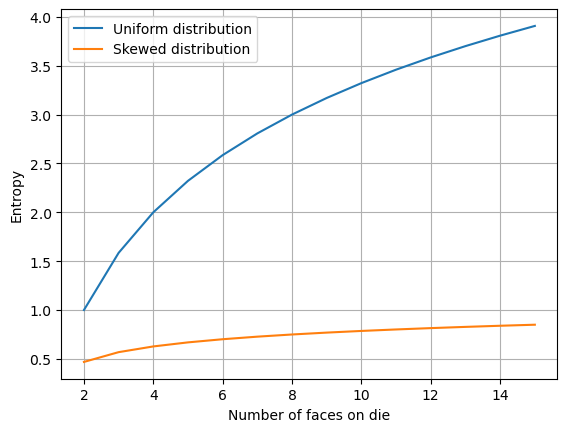

In [4]:
x = range(2, 16)
y = [sum([-(1/n) * d.log2(1/n) for _ in range(n)]) for n in x]
z = [sum([-0.9 * d.log2(0.9) if i == 0 else -(0.1/(n-1)) * d.log2(0.1/(n-1)) for i in range(n)]) for n in x]

plt.plot(x, y, label='Uniform distribution')
plt.plot(x, z, label='Skewed distribution')
plt.xlabel('Number of faces on die')
plt.ylabel('Entropy')
plt.grid()
plt.legend()
plt.show()

### Assignment 3

The information gain represents the reduction of entropy given some information gained by some attribute. Then, high information gain would mean that splitting a data set based on the attribute would result in subsets that are more homogenous and have lower entroy since it reduces the overall uncertainty of the subsets.

In [5]:
for n, monk in enumerate(monks):
        print(f'MONK-{n + 1}')
        for i in range(6):
            print(f'A{i+1}:', round(d.averageGain(monk, m.attributes[i]), 6), end=' ')
        print()
        print('Best attribute:', d.bestAttribute(monk, m.attributes))
        print()

MONK-1
A1: 0.075273 A2: 0.005838 A3: 0.004708 A4: 0.026312 A5: 0.287031 A6: 0.000758 
Best attribute: A5

MONK-2
A1: 0.003756 A2: 0.002458 A3: 0.001056 A4: 0.015664 A5: 0.017277 A6: 0.006248 
Best attribute: A5

MONK-3
A1: 0.007121 A2: 0.293736 A3: 0.000831 A4: 0.002892 A5: 0.255912 A6: 0.007077 
Best attribute: A2



Given the results above it would be wisest to split MONK-1 and MONK-2 using A5, and to split MONK-3 using A2, since these attributes contribute with the most information gain for their respective dataset.


### Assignment 4 ###

When the infromation gain is maximized, the entropy of the subsets S_k is minimal. This happens when the resulting splits of the set have minimal randomness or uncertainty, in other words: the resulting subsets mostly contain examples from one class only. An extreme example of this is when a resulting split has zero entropy, meaning that we know the class for any example in the subset.

When using information gain as a heuristic to split some data we have the goal to reduce entropy of the resulting subsets in as few splits as possible, making the classification as fast, simple and efficient as possible.

### Assignment 5

In [6]:
for i in range(len(monks)):
    print(f'MONK-{i + 1}')

    t = d.buildTree(monks[i], m.attributes)

    train_accuracy = d.check(t, monks[i])
    test_accuracy = d.check(t, monks_test[i])

    train_error = 1 - train_accuracy
    test_error = 1 - test_accuracy

    print(f'Training Error: {train_error}')
    print(f'Test Error: {test_error}')

MONK-1
Training Error: 0.0
Test Error: 0.17129629629629628
MONK-2
Training Error: 0.0
Test Error: 0.30787037037037035
MONK-3
Training Error: 0.0
Test Error: 0.05555555555555558


In [7]:
monk1_A5 = d.select(m.monk1, m.attributes[4], 1)
monk1_A5_tree = d.buildTree(monk1_A5, m.attributes)
print(monk1_A5_tree)

A1(+++)


In [8]:
d.mostCommon(monk1_A5)

True

In [9]:
d.allPositive(monk1_A5)

True

In [10]:
for i in range(6):
        print(f'A{i+1}:', round(d.averageGain(monk1_A5, m.attributes[i]), 6), end=' ')
        print()
        print('Best attribute:', d.bestAttribute(monk1_A5, m.attributes))
        print()

A1: 0.0 
Best attribute: A1

A2: 0.0 
Best attribute: A1

A3: 0.0 
Best attribute: A1

A4: 0.0 
Best attribute: A1

A5: 0.0 
Best attribute: A1

A6: 0.0 
Best attribute: A1



The results above indicate that after splitting the root node using A5 we get a subset that is entirely comprised of one class - the "True" class. (???)

In [11]:
monk1_A5_id3_tree = d.buildTree(m.monk1, m.attributes, 2)
monk1_A5_id3_tree

A5(+A4(---)A6(--)A1(--+))

It looks like ID3 splits the set using A5 as the root node as well. (Not really sure how to read the print out above.)

### Assignment 6 ###

Whithout pruning, a decision tree can end up having high variance and low bias since it models the training data very well, but might be lacking when it comes to being general enough to classify unseen data correctly. Therefore, by pruning the decision tree - greedily searching for an optimal trade off between variance and bias (complexity and generallity/simplicity) that maximizes the accuracy of the tree given some validation data - we aim to generalize the model enough so that it performes well on new, unseen datasets.

### Assignment 7

In [12]:
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def getPruned(tree, val):
    best_accuracy = d.check(tree, val)

    while True:
        pruned_trees = d.allPruned(tree)
        improved = False

        for pt in pruned_trees:
            pt_accuracy = d.check(pt, val)

            if pt_accuracy > best_accuracy:
                tree = pt
                best_accuracy = pt_accuracy
                improved = True

        if not improved:
            break
        
    return tree

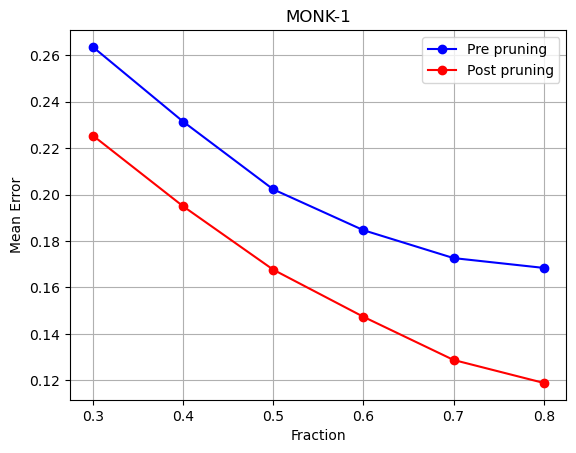

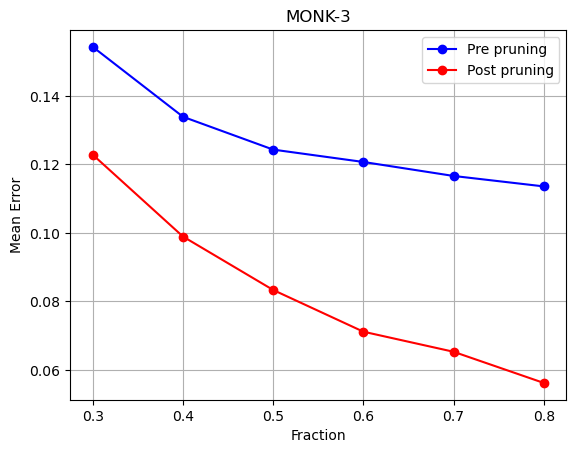

In [14]:
iter = 1000
fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for monk in [m.monk1, m.monk3]:
    accuracy = []
    pruned_accuracy = []

    for fraction in fractions:
        acc = 0
        pacc = 0

        for i in range(iter):
            train, val = partition(monk, fraction)
            tree = d.buildTree(train, m.attributes)
            
            pruned_tree = getPruned(tree, val)

            acc += d.check(tree, val)
            pacc += d.check(pruned_tree, val)

        mean_error = 1 - (acc / iter)
        pruned_mean_error = 1 - (pacc / iter)

        accuracy.append(mean_error)
        pruned_accuracy.append(pruned_mean_error)

    plt.figure()
    plt.plot(fractions, accuracy, label='Pre pruning', linestyle='-', marker='o', color='b')
    plt.plot(fractions, pruned_accuracy, label='Post pruning', linestyle='-', marker='o', color='r')
    plt.xlabel('Fraction')
    plt.ylabel('Mean Error')
    plt.title(f'MONK-{1 if monk == m.monk1 else 3}')
    plt.grid()
    plt.legend()

plt.show()